In [1]:
#Packages
import h5py
import os
import numpy as np    
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit as fit
import func as func

In [ ]:
#Directory with data:
datadir = "G2-sphere/"

files = os.listdir(datadir+".")
files.sort()

for file in files:    #Importing data (Particle Type 1 - dark matter, Particle Type 2 - baryonic matter):
    f = h5py.File(datadir+file, "r")
    group = f["PartType1"]
    data = group["Coordinates"][()]
    vel = group["Velocities"][()]
    
    #Plotting the initial conditions of both galaxies:
    fig = plt.figure(figsize=(10,10),dpi=100)
    ax = plt.axes(projection='3d')
    plot = ax.scatter3D(data[:,0],data[:,1],data[:,2],'k.',s=1,c=vel[:,0],cmap="viridis")
    cbar = fig.colorbar(plot, ax = ax)
    cbar.set_label('Vx', rotation=0)
    plt.show()

0.8059959770082348


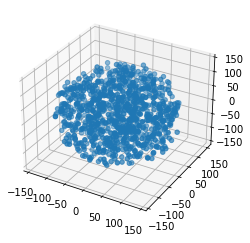

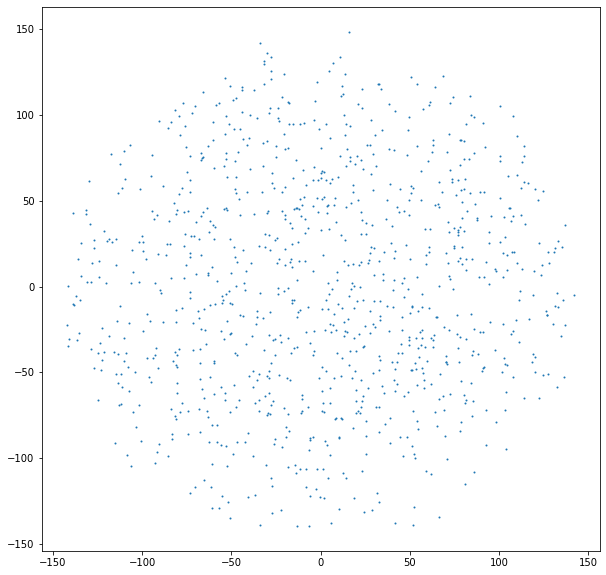

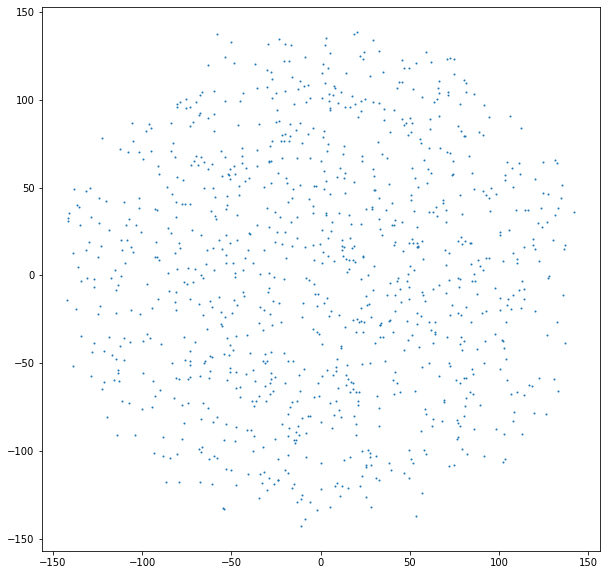

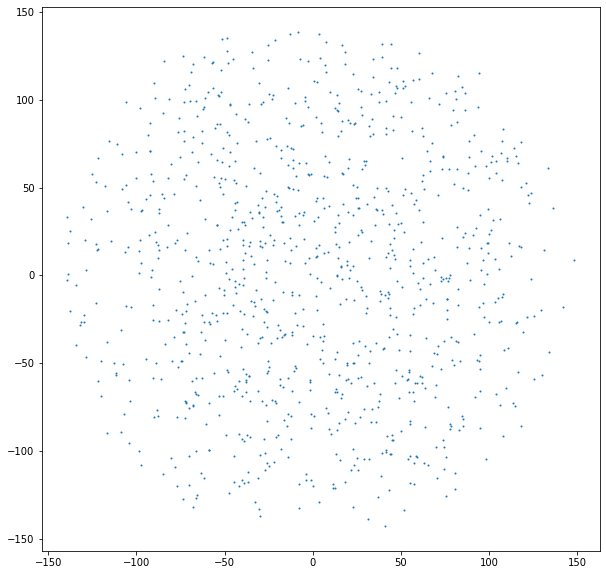

In [2]:
#Create Distribution

import random
import numpy as np

random.seed(77)

npart = 1000
Mtotal = 1e+12 #10e4msun
rmax = 150 #kpc
Vtot = 4*np.pi*(rmax**3)/3 #kpc^3
n = npart/(Vtot) #kpc^-3
meanlen = (1/n)**(1/3) #kpc

soft = meanlen/30
print(soft)

sall = 1

phi = np.random.uniform(0,2*np.pi,npart)
costheta = np.random.uniform(-1,1,npart)
u = np.random.uniform(0,1,npart)

theta = np.arccos( costheta )
r = rmax *u**(1/3)

x = r * np.sin( theta) * np.cos( phi )
y = r * np.sin( theta) * np.sin( phi )
z = r * np.cos( theta )

ID = np.linspace(1,npart,npart,dtype = int)

#Check uniformity
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

plt.figure(figsize=(10,10))
plt.scatter(x,y,s=sall)
plt.figure(figsize=(10,10))
plt.scatter(x,z,s=sall)
plt.figure(figsize=(10,10))
plt.scatter(y,z,s=sall)

x.shape = (npart,1)
y.shape = (npart,1)
z.shape = (npart,1)
Coordinates = np.concatenate((x,y,z),axis = 1)
Velocities = np.zeros_like(Coordinates)

#Create hdf5

import h5py
import sys

filename = 'SphereIC.hdf5'

!rm SphereIC.hdf5
#Create File
file = h5py.File(filename,'w')

#Create Group
header = file.create_group("Header")
PartType1 = file.create_group("PartType1")

coordsDSET = file.create_dataset("/PartType1/Coordinates", (npart,3), dtype =  h5py.h5t.IEEE_F32LE)
IDsDSET = file.create_dataset("/PartType1/ParticleIDs", (npart,), dtype =   h5py.h5t.STD_U32LE)
velsDSET = file.create_dataset("/PartType1/Velocities", (npart,3), dtype =  h5py.h5t.IEEE_F32LE)

coordsDSET[...] = Coordinates
IDsDSET[...] = ID
velsDSET[...] = Velocities


nparts = np.zeros(3)
nparts[1] = npart
header.attrs['NumPart_ThisFile']    = nparts

massvec = np.zeros(3)
massvec[1] = Mtotal/npart

header.attrs['MassTable']           = massvec
header.attrs['Time']                = 0
header.attrs['Redshift']            = 15
header.attrs['NumPart_Total']       = nparts
header.attrs['NumFilesPerSnapshot'] = 1
header.attrs['BoxSize']             = 1.0
header.attrs['Omega0']              = 1.0
header.attrs['OmegaLambdda']        = 0.
header.attrs['HubbleParam']         = 0.7
header.attrs['Flag_Entropy_ICs']    = 0
header.attrs['NumPart_Total_HighWord'] = np.zeros(3)


# Close the file before exiting
#
file.close()